In [1]:
import pandas as pd
import re
import nltk

In [2]:
wlp=pd.read_csv('wordLemPoS.txt',delim_whitespace=True,encoding="ANSI")

C:\Users\David\AppData\Local\Temp\ipykernel_1968\2491024827.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  wlp=pd.read_csv('wordLemPoS.txt',delim_whitespace=True,encoding="ANSI")


In [3]:
wlp

,textID,ID(seq),word,lemma,PoS
0,-----,-----,-----,-----,-----
1,124,2511368388,@@124,NaN,NaN
2,124,2511368389,Gran,gran,o
3,124,2511368390,convocatoria,convocatoria,nfs
4,124,2511368391,para,para,e
...,...,...,...,...,...
2344448,2525124,771529315,para,para,e
2344449,2525124,771529316,sus,su,dp-
2344450,2525124,771529317,nuevas,nuevo,jfp
2344451,2525124,771529318,campañas,campaña,nfp


In [4]:
wlp['PoS'].value_counts()

e         306947
y         254521
n         145791
nms       136768
nfs       120672
           ...  
fp             2
-----          1
fe             1
pd-3mp         1
fx             1
Name: PoS, Length: 190, dtype: int64

In [5]:
wlp['PoS'].unique()

array(['-----', nan, 'o', 'nfs', 'e', 'ld-ms', 'nms', 'jms', 'cs', 'po',
       'vip-3s', 'ld-fs', 'li-fs', 'jfs', 'nmp', 'y', 'vps-fs', 'm$',
       'dd-', 'vis-3s', 'mc', 'ld-mp', 'ld-fp', 'nfp', 'pr-3cp', 'vis-3p',
       'dp-', 'vip-3p', 'vr', 'vps-mp', 'cc', 'cS_31', 'cS_32', 'cS_33',
       'dxmp-ind-', 'vpp', 'dxfp-ind-', 'vsi-3p', 'r', 'jmp', 'n', 'jfp',
       'j', 'vif-3s', 'vps-ms', 'pi-0ms', 'vsp-1/3s', 'vif-3p', 'li-ms',
       'vip-1p', 'v', 'dxfs-ind-', 'dxms-ind-', 'dxfs-', 'pd-3cs',
       'vis-1s', 'pq-3cn', 'vis-1p', 'vip-1p/vis-1p', 'pr-3cs', 'b',
       'vsi-1/3s', 'e_22', 'e_21', 'e_32', 'li-fp', 'vps-fp', 'vif-1p',
       'cS_21', 'cS_22', 'vsp-1p', 'dxcs-ind-', 'px-ms', 'ld', 'vc-1/3s',
       'ps', 'N', 'li-mp', 'dxcs-dem-', 'vip-2s', 'vii-1/3s', 'vc-3p',
       'pr-3fs', 'dxfs-int-', 'vii-3p', 'pq-3cn"', 'vip-1s', 'vsp-3p',
       'cS_41', 'cS_42', 'cS_43', 'cS_44', 'cc-', 'vpp-00', 'pv',
       'pr-3cn"', 'pq-3cs', 'i', 'px-mp', 'pi-3cs', 'vii-1p', 'cC_21',
 

In [6]:
wlp[wlp['PoS']=='fj']

,textID,ID(seq),word,lemma,PoS
25627,29124,770194945,intense,intense,fj
43003,51124,2216516685,prime,prime,fj
462000,528124,770405321,Prime,prime,fj
462025,528124,770405346,Prime,prime,fj
462057,528124,770405378,Prime,prime,fj
462103,528124,770405424,Prime,prime,fj
462124,528124,770405445,Prime,prime,fj
462147,528124,770405468,Prime,prime,fj
580262,618124,770491566,Heavy,heavy,fj
582378,623124,770493538,full-time,full-time,fj


In [7]:
wlp['tipo']=wlp['PoS'].apply(lambda x: str(x)[0])

In [9]:
wlp[wlp['tipo']=='v']

,textID,ID(seq),word,lemma,PoS,tipo
10,124,2511368397,realiza,realizar,vip-3s,v
22,124,2511368409,convocada,convocar,vps-fs,v
42,124,2511368429,realizó,realizar,vis-3s,v
57,124,2511368444,comenzó,comenzar,vis-3s,v
68,124,2511368455,hablaron,hablar,vis-3p,v
...,...,...,...,...,...,...
2344401,2525124,771529268,costará,costar,vif-3s,v
2344409,2525124,771529276,estará,estar,vif-3s,v
2344425,2525124,771529292,facilitan,facilitar,vip-3p,v
2344439,2525124,771529306,deja,dejar,v,v


In [25]:
def ultimasilaba(palabra):
    #print(palabra)
    medidorsilaba=-1
    vocalcerrada=False
    vocalabierta=False
    for pos,letra in enumerate(palabra[::-1]):
        if letra in ["a","e","i","o","u","y","á","é","í","ó","ú"]:
            medidorsilaba -= pos
            break
    if palabra[medidorsilaba] in ["a","e","o","á","é","ó"]:
        vocalabierta=True
    elif palabra[medidorsilaba] in ["i","u","í","ú","y"]:
        vocalcerrada=True
    if len(palabra)+medidorsilaba>0:
        if (palabra[medidorsilaba-1] in ["a","e","o","á","é","ó","í","ú"]) and vocalabierta:
            pass
            #print(palabra[medidorsilaba:])
            #return palabra[medidorsilaba:]
        elif palabra[medidorsilaba-1] in ["a","e","o","á","é","ó","í","ú","i","u"]:
            medidorsilaba-=1
            if len(palabra)+medidorsilaba>0:
                if palabra[medidorsilaba-1] not in ["l","r","a","e","o","á","é","ó","í","ú","i","u"]:
                    medidorsilaba-=1
                elif palabra[medidorsilaba-1] in ["l","r"]:
                    medidorsilaba-=2
                else:
                    if (palabra[medidorsilaba] in ["e","i","é","í"]) and (palabra[medidorsilaba-1] == "u") and (palabra[medidorsilaba-2] in ["g","q"]):
                        medidorsilaba-=2
                        #print(palabra[medidorsilaba:])
                    else:
                        medidorsilaba-=1
                        if len(palabra)+medidorsilaba>0:
                            if palabra[medidorsilaba-1] not in ["l","r","a","e","o","á","é","ó","í","ú","i","u"]:
                                medidorsilaba-=1
                            elif palabra[medidorsilaba-1] in ["l","r"]:
                                medidorsilaba-=2
                            else:
                                pass
                                #print(palabra)
                        else:
                            pass
            else:
                pass
        else:
            medidorsilaba-=1
            if len(palabra)+medidorsilaba>0:
                if palabra[medidorsilaba-1] in ["a","e","o","á","é","ó","í","ú","i","u","y"]:
                    pass
                    #print(palabra[medidorsilaba:])
                elif palabra[medidorsilaba] not in ["l","r"]:
                    pass
                    #print(palabra[medidorsilaba:])
                else:
                    medidorsilaba-=1
                    #print(palabra[medidorsilaba:])
    return palabra[medidorsilaba:]


In [16]:
def silabasplitter(palabra,palabradividida = list()):
    ultimasil = ultimasilaba(palabra)
    if (ultimasil == palabra) | (palabra == ""):
        palabradividida.append(ultimasilaba(palabra))
    else:
        #print(palabra)
        ultima=ultimasilaba(palabra)
        palabradividida.append(ultima)
        largo_ultima=len(ultima)
        silabasplitter(palabra[:-largo_ultima],palabradividida)
    return palabradividida

In [17]:
silabasplitter("ayuntar")

['tar', 'yun', 'a']

In [27]:
silabasplitter("pinguino", [])

['no', 'gui', 'pin']

In [20]:
wlp['ultima_silaba']=wlp['word'].apply(lambda x: silabasplitter(str(x),[])[0])

In [38]:
wlp['ultima_letra']=wlp['word'].apply(lambda x: str(x)[-1])

In [39]:
wlp['extension']=wlp['word'].apply(lambda x: len(str(x)))

In [40]:
wlp['silabas']=wlp['word'].apply(lambda x: len(silabasplitter(str(x),[])))

In [36]:
wlp.drop(wlp[wlp['tipo']=="A"].index, inplace=True)

In [47]:
wlp.drop(['textID','ID(seq)'],inplace=True,axis=1)

In [54]:
wlp['det1']=wlp['PoS'].apply(lambda x:str(x)[1] if len(str(x))>1 else "-")

In [58]:
wlp['det2']=wlp['PoS'].apply(lambda x:str(x)[2:] if len(str(x))>2 else "-")

In [59]:
wlp

,word,lemma,PoS,tipo,ultima_silaba,ultima_letra,extension,silabas,det1,det2
2,Gran,gran,o,o,Gran,n,4,1,-,-
3,convocatoria,convocatoria,nfs,n,oria,a,12,4,f,s
4,para,para,e,e,ra,a,4,2,-,-
5,el,el,ld-ms,l,el,l,2,1,d,-ms
6,concurso,concurso,nms,n,so,o,8,3,m,s
...,...,...,...,...,...,...,...,...,...,...
2344447,Advertinsing,advertinsing,o,o,sing,g,12,4,-,-
2344448,para,para,e,e,ra,a,4,2,-,-
2344449,sus,su,dp-,d,sus,s,3,1,p,-
2344450,nuevas,nuevo,jfp,j,vas,s,6,2,f,p


In [61]:
wlp['det1'].value_counts()

-    984130
m    274687
d    223877
i    202662
f    188579
s    102397
c     90442
p     68298
r     67091
o     64297
x     28349
$     25144
S     11292
_      4357
q      2870
n      1333
C       851
v       425
j       129
5         9
e         6
2         5
Name: det1, dtype: int64

In [63]:
wlp[wlp['det1']=="2"]

,word,lemma,PoS,tipo,ultima_silaba,ultima_letra,extension,silabas,det1,det2
133563,actuemos,actuar,v29,v,mos,s,8,3,2,9
647931,Evaluemos,evaluar,v29,v,mos,s,9,3,2,9
649331,evaluemos,evaluar,v29,v,mos,s,9,3,2,9
656170,evaluemos,evaluar,v29,v,mos,s,9,3,2,9
2121495,Continuemos,continuar,v29,v,mos,s,11,4,2,9


In [92]:
wlp[(wlp['tipo']=="n")]["det1"].value_counts()

m    199016
f    162212
-     37433
p       243
j       102
Name: det1, dtype: int64

In [91]:
wlp[(wlp['det1']=="-")&(wlp['tipo']=="n")]

,word,lemma,PoS,tipo,ultima_silaba,ultima_letra,extension,silabas,det1,det2
128,presidenta,presidenta,n,n,ta,a,10,4,-,-
156,directora,directora,n,n,ra,a,9,4,-,-
333,refuncionalizar,refuncionalizar,n,n,zar,r,15,6,-,-
396,egresados,egresado,n,n,dos,s,9,4,-,-
560,Agenda,agenda,n,n,da,a,6,3,-,-
...,...,...,...,...,...,...,...,...,...,...
2344154,Directora,directora,n,n,ra,a,9,4,-,-
2344201,empoderamiento,empoderamiento,n,n,to,o,14,6,-,-
2344270,empoderamiento,empoderamiento,n,n,to,o,14,6,-,-
2344311,impulsoras,impulsora,n,n,ras,s,10,4,-,-


In [89]:
wlp.drop(wlp[(wlp['word']=="%")].index,inplace=True)

In [90]:
wlp[(wlp['word']=="%")]

,word,lemma,PoS,tipo,ultima_silaba,ultima_letra,extension,silabas,det1,det2


In [209]:
df=wlp.copy()

In [210]:
df.drop(df[(df['det1']=="p")&(df['tipo']=="n")].index,inplace=True)
df.drop(df[(df['det1']=="j")&(df['tipo']=="n")].index,inplace=True)
df.drop(df[(df['det1']=="-")&(df['tipo']=="n")].index,inplace=True)
df.drop(df[(df['det1']=="-")&(df['tipo']=="v")].index,inplace=True)
df.drop(df[(df['det1']=="9")&(df['tipo']=="v")].index,inplace=True)
df.drop(df[(df['det1']=="1")&(df['tipo']=="v")].index,inplace=True)

In [214]:
df.drop(df[(df['tipo']=="N")].index,inplace=True)#(df['det2']=="-")&
df.drop(df[(df['tipo']=="A")].index,inplace=True)

In [215]:
df['tipo'].value_counts()

n    361228
e    311294
v    282921
y    254519
l    239348
c    164200
j    130371
r    118235
o    102502
p     94807
d     70471
m     36948
x      2784
i      2414
f      1529
b       243
Name: tipo, dtype: int64

In [212]:
df[(wlp['tipo']=="i")]#(df['det1']=="m")&

C:\Users\David\AppData\Local\Temp\ipykernel_1968\325847774.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(wlp['tipo']=="i")]#(df['det1']=="m")&


,word,lemma,PoS,tipo,ultima_silaba,ultima_letra,extension,silabas,det1,det2
3260,No,no,i,i,No,o,2,1,-,-
12990,adiós,adiós,i,i,diós,s,5,2,-,-
17644,Hola,hola,i,i,la,a,4,2,-,-
18320,jajaja,jaja,i,i,ja,a,6,3,-,-
24657,No,no,i,i,No,o,2,1,-,-
...,...,...,...,...,...,...,...,...,...,...
2328809,no,no,i,i,no,o,2,1,-,-
2329123,He,he,i,i,He,e,2,1,-,-
2336407,je,jeje,i,i,je,e,2,1,-,-
2337470,No,no,i,i,No,o,2,1,-,-


In [155]:
#df.to_csv('tabla_tipos.csv',sep=";",index=False)

In [219]:
df=pd.read_csv('tabla_tipos.csv',delimiter=";")

In [220]:
df

,word,lemma,tipo,ultima_silaba,ultima_letra,extension,silabas,det1,det2
0,Gran,gran,o,Gran,n,4,1,-,-
1,convocatoria,convocatoria,n,oria,a,12,4,f,s
2,para,para,e,ra,a,4,2,-,-
3,el,el,l,el,l,2,1,d,-ms
4,concurso,concurso,n,so,o,8,3,m,s
...,...,...,...,...,...,...,...,...,...
2110094,Advertinsing,advertinsing,o,sing,g,12,4,-,-
2110095,para,para,e,ra,a,4,2,-,-
2110096,sus,su,d,sus,s,3,1,p,-
2110097,nuevas,nuevo,j,vas,s,6,2,f,p


In [221]:
from sklearn.preprocessing import LabelEncoder
class_labelEncoding = LabelEncoder()
class_labelEncoding.fit(df["tipo"].values)
clase = class_labelEncoding.transform(df["tipo"].values)
df['tipo']=clase

In [223]:
df_ord=df.sort_values('ultima_silaba')
labelEncoding = LabelEncoder()
labelEncoding.fit(df_ord["ultima_silaba"].values)
ul_sil = labelEncoding.transform(df["ultima_silaba"].values)
df['ultima_silaba']=ul_sil

In [224]:
df_ord=df.sort_values('lemma')
encod_lemma = LabelEncoder()
encod_lemma.fit(df_ord["lemma"].values)
lemmas = encod_lemma.transform(df["lemma"].values)
df['lemma']=lemmas

In [226]:
dummies=pd.get_dummies(df['ultima_letra'],prefix="u_let",drop_first=True)
df=pd.concat([df,dummies],axis=1)

In [227]:
df

,word,lemma,tipo,ultima_silaba,ultima_letra,extension,silabas,det1,det2,u_let_#,...,u_let_é,u_let_ë,u_let_ì,u_let_í,u_let_ñ,u_let_ó,u_let_ô,u_let_ú,u_let_€,u_let_™
0,Gran,24530,10,1208,n,4,1,-,-,0,...,0,0,0,0,0,0,0,0,0,0
1,convocatoria,15059,9,5138,a,12,4,f,s,0,...,0,0,0,0,0,0,0,0,0,0
2,para,36489,3,5410,a,4,2,-,-,0,...,0,0,0,0,0,0,0,0,0,0
3,el,19384,7,3600,l,2,1,d,-ms,0,...,0,0,0,0,0,0,0,0,0,0
4,concurso,14414,9,5761,o,8,3,m,s,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110094,Advertinsing,5588,10,5724,g,12,4,-,-,0,...,0,0,0,0,0,0,0,0,0,0
2110095,para,36489,3,5410,a,4,2,-,-,0,...,0,0,0,0,0,0,0,0,0,0
2110096,sus,45086,2,5802,s,3,1,p,-,0,...,0,0,0,0,0,0,0,0,0,0
2110097,nuevas,35058,6,6219,s,6,2,f,p,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
palabras=df['word'].copy()

In [230]:
df.drop(['word','det1','det2','ultima_letra'],axis=1,inplace=True)

In [234]:
df

,lemma,tipo,ultima_silaba,extension,silabas,u_let_#,u_let_$,u_let_&,u_let_',u_let_(,...,u_let_é,u_let_ë,u_let_ì,u_let_í,u_let_ñ,u_let_ó,u_let_ô,u_let_ú,u_let_€,u_let_™
0,24530,10,1208,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15059,9,5138,12,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,36489,3,5410,4,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19384,7,3600,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14414,9,5761,8,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110094,5588,10,5724,12,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110095,36489,3,5410,4,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110096,45086,2,5802,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110097,35058,6,6219,6,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [236]:
X=df.drop(['tipo'],axis=1)
y=df['tipo']

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [252]:
clf = RandomForestClassifier(n_estimators= 3000,
                            criterion= "entropy",
                             max_depth= 5,
                             max_features= "auto",
                             max_leaf_nodes= 8,
                             min_impurity_decrease= 0.1,
                             min_samples_split= 2,
                             bootstrap=False)

clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

Exactitud:  0.4520085935895613
[[     0      0      0     61      0      0      0      0      0     12
       0      0      0      0      0      0]
 [     0      0      0  44097      0      0      0      4      0   5159
       0      0      0      0      0      0]
 [     0      0      0   7036      0      0      0    202      0  13903
       0      0      0      0      0      0]
 [     0      0      0  80117      0      0      0     65      0  13206
       0      0      0      0      0      0]
 [     0      0      0    124      0      0      0      1      0    334
       0      0      0      0      0      0]
 [     0      0      0    234      0      0      0      0      0    490
       0      0      0      0      0      0]
 [     0      0      0    750      0      0      0    122      0  38239
       0      0      0      0      0      0]
 [     0      0      0  43501      0      0      0  23231      0   5072
       0      0      0      0      0      0]
 [     0      0      0    688    

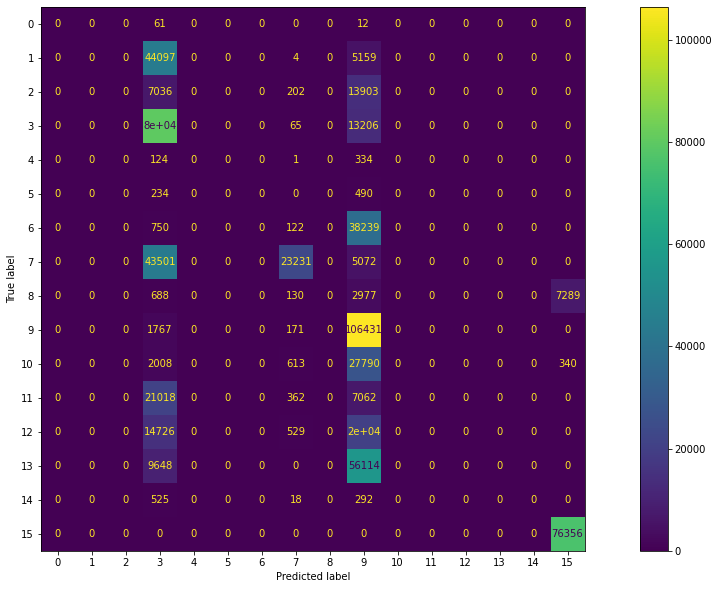

In [253]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
print("Exactitud: " , accuracy_score(y_test, yhat))
cm = confusion_matrix(y_test, yhat)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [245]:
class_labelEncoding.inverse_transform(range(16))

array(['b', 'c', 'd', 'e', 'f', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'r',
       'v', 'x', 'y'], dtype=object)

In [248]:
class_labelEncoding.inverse_transform([13])

array(['v'], dtype=object)

In [249]:
df[df['tipo']==13]

,lemma,tipo,ultima_silaba,extension,silabas,u_let_#,u_let_$,u_let_&,u_let_',u_let_(,...,u_let_é,u_let_ë,u_let_ì,u_let_í,u_let_ñ,u_let_ó,u_let_ô,u_let_ú,u_let_€,u_let_™
8,40650,13,6516,7,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,15058,13,3350,9,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,40650,13,6586,7,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
55,14002,13,6586,7,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
66,25065,13,5530,8,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110048,43693,13,5530,6,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110053,15376,13,5616,7,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110061,21133,13,5616,6,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110075,22015,13,5853,9,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [254]:
y_test.value_counts()

9     108369
3      93388
15     76356
7      71804
13     65762
1      49260
6      39111
12     35471
10     30751
11     28442
2      21141
8      11084
14       835
5        724
4        459
0         73
Name: tipo, dtype: int64